## Assignment 4
### Abhijith Ravikumar Puthussery (qaw164)

Here is a link to a sample Logistic Regression model for email spam/ham classification: http://jrmeyer.github.io/tutorial/2016/02/01/TensorFlow-Tutorial.html

Follow the steps in the tutorial and write a Tensorflow program using your cloud ML instance.
Questions:
a)

* What's the best accuracy you get on the test dataset?
* What's the optimum value of the numEpochs and the learningRate.
* Plot the error with Matplotlib

b)

* Add new neural network layers and training the model again. comapre the error function between these two models.



In [11]:
import matplotlib
matplotlib.use('Agg')
from __future__ import division
import tensorflow as tf
import numpy as np
import tarfile
import os
import matplotlib.pyplot as plt
import time
%matplotlib inline

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1175: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [12]:
## Import Data

def csv_to_numpy_array(filePath, delimiter):
    return np.genfromtxt(filePath, delimiter=delimiter, dtype=None)

def import_data():
    if "data" not in os.listdir(os.getcwd()):
        # Untar directory of data if we haven't already
        tarObject = tarfile.open("data.tar.gz")
        tarObject.extractall()
        tarObject.close()
        print("Extracted tar to current directory")
    else:
        # we've already extracted the files
        pass

    print("loading training data")
    trainX = csv_to_numpy_array("data/trainX.csv", delimiter="\t")
    trainY = csv_to_numpy_array("data/trainY.csv", delimiter="\t")
    print("loading test data")
    testX = csv_to_numpy_array("data/testX.csv", delimiter="\t")
    testY = csv_to_numpy_array("data/testY.csv", delimiter="\t")
    return trainX,trainY,testX,testY

trainX,trainY,testX,testY = import_data()

loading training data
loading test data


In [13]:
# DATA SET PARAMETERS
# Get our dimensions for our different variables and placeholders:
# numFeatures = the number of words extracted from each email(great,dog,pill)
numFeatures = trainX.shape[1]
# numLabels = number of classes we are predicting (here just 2: Ham or Spam)
numLabels = trainY.shape[1]

# TRAINING SESSION PARAMETERS
# number of times we iterate through training data
# tensorboard shows that accuracy plateaus at ~25k epochs
numEpochs = 1000
# a smarter learning rate for gradientOptimizer
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [14]:
# Define Hidden Layer
hidden=4

In [15]:
### Placeholders

# X = X-matrix / feature-matrix / data-matrix... It's a tensor to hold our email data. '
# None' here means that we can hold any number of emails
X = tf.placeholder(tf.float32, [None, numFeatures])
# yGold = Y-matrix / label-matrix / labels... This will be our correct answers matrix. 
# Every row has either [1,0] for SPAM or [0,1] for HAM. 'None' here means that we can hold any number of emails
yGold = tf.placeholder(tf.float32, [None, numLabels])

In [18]:
# Values are randomly sampled from a Gaussian with a standard deviation of sqrt(6 / (numInputNodes + numOutputNodes + 1))

hidden_weights = tf.Variable(tf.random_normal([numFeatures,hidden],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                       name="hidden_weights"))
weights = tf.Variable(tf.random_normal([hidden,numLabels],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                    name="bias"))

In [19]:
### Prediction Ops

# INITIALIZE our weights and biases
init_OP = tf.initialize_all_variables()

# PREDICTION ALGORITHM i.e. FEEDFORWARD ALGORITHM
apply_hidden_weights_OP = tf.matmul(X, hidden_weights, name="apply_hidden_weights")
apply_weights_OP = tf.matmul(apply_hidden_weights_OP, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

In [20]:
# COST FUNCTION i.e. MEAN SQUARED ERROR
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")

In [21]:
# OPTIMIZATION ALGORITHM i.e. GRADIENT DESCENT
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [22]:
### Visualization

epoch_values=[]
accuracy_values=[]
cost_values=[]


step 0, training accuracy 0.4617
step 0, cost 347.439
step 0, change in cost 347.439
step 10, training accuracy 0.463799
step 10, cost 336.726
step 10, change in cost 10.7136
step 20, training accuracy 0.474292
step 20, cost 323.819
step 20, change in cost 12.9064
step 30, training accuracy 0.474292
step 30, cost 308.626
step 30, change in cost 15.1938
step 40, training accuracy 0.478489
step 40, cost 292.422
step 40, change in cost 16.2037
step 50, training accuracy 0.50787
step 50, cost 277.727
step 50, change in cost 14.6953
step 60, training accuracy 0.520462
step 60, cost 266.572
step 60, change in cost 11.1544
step 70, training accuracy 0.533054
step 70, cost 259.107
step 70, change in cost 7.4649
step 80, training accuracy 0.528856
step 80, cost 254.257
step 80, change in cost 4.85068
step 90, training accuracy 0.521511
step 90, cost 250.904
step 90, change in cost 3.35303
step 100, training accuracy 0.527807
step 100, cost 248.324
step 100, change in cost 2.58002
step 110, trai

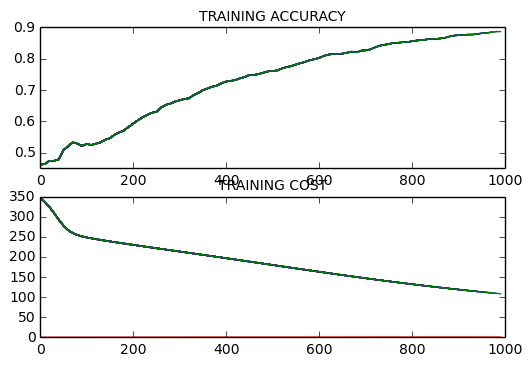

In [23]:
# Turn on interactive plotting
plt.ion()
# Create the main, super plot
fig = plt.figure()
# Create two subplots on their own axes and give titles
ax1 = plt.subplot("211")
ax1.set_title("TRAINING ACCURACY", fontsize=10)
ax2 = plt.subplot("212")
ax2.set_title("TRAINING COST", fontsize=10)
# plt.tight_layout()

# Create a tensorflow session
sess = tf.Session()

# Initialize all tensorflow variables
sess.run(init_OP)

## Ops for vizualization
# argmax(activation_OP, 1) gives the label our model thought was most likely
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))
# False is 0 and True is 1, what was our average?
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))
# Summary op for regression output
activation_summary_OP = tf.histogram_summary("output", activation_OP)
# Summary op for accuracy
accuracy_summary_OP = tf.scalar_summary("accuracy", accuracy_OP)
# Summary op for cost
cost_summary_OP = tf.scalar_summary("cost", cost_OP)
# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.histogram_summary("weights", weights.eval(session=sess))
biasSummary = tf.histogram_summary("biases", bias.eval(session=sess))
# Merge all summaries
#####all_summary_OPS = tf.merge_all_summaries()
# Summary writer
#writer = tf.train.SummaryWriter("summary_logs", sess.graph_def)

# Initialize reporting variables
cost = 0
diff = 1

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            #summary_results = sess.run(all_summary_OPS, feed_dict={X: trainX, yGold: trainY})
            train_accuracy = sess.run(accuracy_OP, feed_dict={X: trainX, yGold: trainY})
            newCost = sess.run(cost_OP, feed_dict={X: trainX, yGold: trainY})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Write summary stats to writer
            #writer.add_summary(summary_results, i)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost
            
            #generate print statements
            print("step %d, training accuracy %g"%(i, train_accuracy))
            print("step %d, cost %g"%(i, newCost))
            print("step %d, change in cost %g"%(i, diff))

            # Plot progress to our two subplots
            accuracyLine, = ax1.plot(epoch_values, accuracy_values)
            costLine, = ax2.plot(epoch_values, cost_values)
            fig.canvas.draw()
            time.sleep(1)


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))
plt.plot(epoch_values,accuracy_values)

Optimum value of the numEpochs=1000 and the learningRate=0.8. Final accuracy on test set=0.93333